In [1]:
!pip install --quiet pyspark

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/gdrive/MyDrive/Datasets/YAFIM-apriori')

In [4]:
from src.LinearApriori import LinearAprioriRunner
from src.SparkApriori import ParallelAprioriRunner

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
chess = "/content/gdrive/MyDrive/Datasets/chess.dat"
mushroom = "/content/gdrive/MyDrive/Datasets/mushroom.dat"

2876.4
Combi Set1: [{'17'}, {'34'}, {'25'}, {'66'}, {'44'}, {'50'}, {'46'}, {'74'}, {'38'}, {'21'}, {'56'}, {'40'}, {'3'}, {'72'}, {'64'}, {'48'}, {'70'}, {'27'}, {'68'}, {'62'}, {'5'}, {'13'}, {'7'}, {'36'}, {'29'}, {'1'}, {'11'}, {'19'}, {'52'}, {'54'}, {'58'}, {'60'}, {'23'}, {'31'}, {'9'}, {'15'}, {'42'}, {'12'}, {'16'}, {'47'}, {'20'}, {'51'}, {'63'}, {'24'}, {'65'}, {'43'}, {'32'}, {'73'}, {'4'}, {'33'}, {'39'}, {'71'}, {'69'}, {'10'}, {'18'}, {'14'}, {'8'}, {'49'}, {'55'}, {'6'}, {'37'}, {'28'}, {'26'}, {'75'}, {'57'}, {'45'}, {'22'}, {'2'}, {'67'}, {'35'}, {'53'}, {'41'}, {'61'}, {'30'}, {'59'}]
Freq Set1: [({'34'}, 3040), ({'66'}, 3021), ({'56'}, 3021), ({'40'}, 3170), ({'48'}, 3013), ({'62'}, 3060), ({'5'}, 2971), ({'7'}, 3076), ({'36'}, 3099), ({'29'}, 3181), ({'52'}, 3185), ({'58'}, 3195), ({'60'}, 3149)]
Combi Set2: [{'56', '62'}, {'58', '5'}, {'66', '40'}, {'60', '58'}, {'66', '36'}, {'66', '7'}, {'5', '48'}, {'56', '29'}, {'52', '58'}, {'36', '48'}, {'5', '29'}, {'66', '

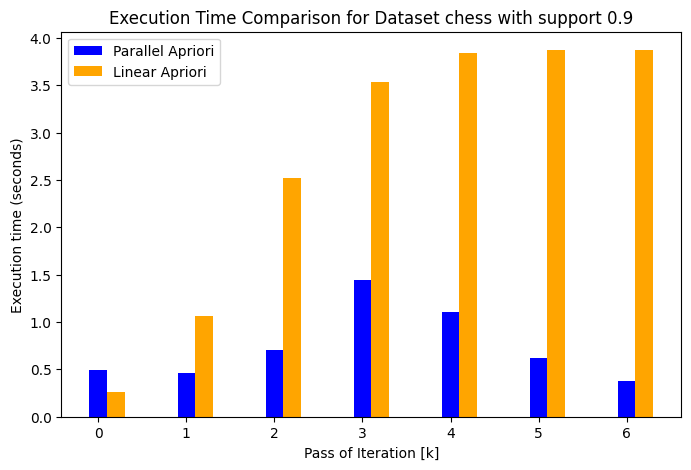

5.450857877731323 18.960128784179688


In [7]:
# Function to run both Linear and Parallel Apriori and plot the results
def run_and_plot(dataset_path, support_threshold):
    # Run Parallel Apriori
    time_list_p,total_time_p = ParallelAprioriRunner(dataset_path, support_threshold)

    # Run Linear Apriori
    time_list_s,total_time_s = LinearAprioriRunner(dataset_path, support_threshold)
    min_length = min(len(time_list_p),len(time_list_s))
    # Create a list for the x-axis (pass of iteration)
    # k_list = list(range(1, min_length + 1))
    k_list = np.arange(min_length)
    total_time_p=sum(time_list_p)
    total_time_s=sum(time_list_s)

    print(f"Total time for Parallel Apriori execution: {total_time_p:.2f} seconds")
    print(f"Total time for Linear Apriori execution: {total_time_s:.2f} seconds")
    # Plot Parallel and Linear Apriori on the same figure
    plt.figure(figsize=(8, 5))
    width=0.2
    plt.bar(k_list, time_list_p[:min_length], color='blue', width=0.2, label='Parallel Apriori')
    plt.bar(k_list+width, time_list_s[:min_length], color='orange', width=0.2, label='Linear Apriori')

    plt.xlabel("Pass of Iteration [k]")
    plt.ylabel("Execution time (seconds)")
    plt.title(f"Execution Time Comparison for Dataset chess with support {support_threshold}")
    plt.legend()
    plt.show()
    return total_time_p,total_time_s

total_time_p,total_time_s = run_and_plot(chess, 0.9)
print(total_time_p,total_time_s)

2556.8
Combi Set1: [{'17'}, {'34'}, {'25'}, {'66'}, {'44'}, {'50'}, {'46'}, {'74'}, {'38'}, {'21'}, {'56'}, {'40'}, {'3'}, {'72'}, {'64'}, {'48'}, {'70'}, {'27'}, {'68'}, {'62'}, {'5'}, {'13'}, {'7'}, {'36'}, {'29'}, {'1'}, {'11'}, {'19'}, {'52'}, {'54'}, {'58'}, {'60'}, {'23'}, {'31'}, {'9'}, {'15'}, {'42'}, {'12'}, {'16'}, {'47'}, {'20'}, {'51'}, {'63'}, {'24'}, {'65'}, {'43'}, {'32'}, {'73'}, {'4'}, {'33'}, {'39'}, {'71'}, {'69'}, {'10'}, {'18'}, {'14'}, {'8'}, {'49'}, {'55'}, {'6'}, {'37'}, {'28'}, {'26'}, {'75'}, {'57'}, {'45'}, {'22'}, {'2'}, {'67'}, {'35'}, {'53'}, {'41'}, {'61'}, {'30'}, {'59'}]
Freq Set1: [({'34'}, 3040), ({'25'}, 2860), ({'66'}, 3021), ({'44'}, 2612), ({'56'}, 3021), ({'40'}, 3170), ({'3'}, 2839), ({'64'}, 2631), ({'48'}, 3013), ({'62'}, 3060), ({'5'}, 2971), ({'7'}, 3076), ({'36'}, 3099), ({'29'}, 3181), ({'52'}, 3185), ({'58'}, 3195), ({'60'}, 3149), ({'9'}, 2874), ({'42'}, 2714)]
Combi Set2: [{'44', '42'}, {'56', '62'}, {'3', '9'}, {'52', '42'}, {'58', '5'

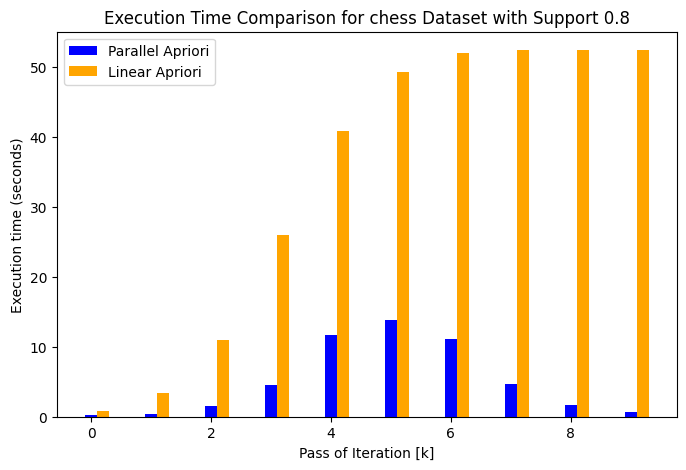

50.87587308883667 340.6487934589386


In [8]:
# Function to run both Linear and Parallel Apriori and plot the results
def run_and_plot(dataset_path, support_threshold):
    # Run Parallel Apriori
    time_list_p,total_time_p = ParallelAprioriRunner(dataset_path, support_threshold)

    # Run Linear Apriori
    time_list_s,total_time_s = LinearAprioriRunner(dataset_path, support_threshold)
    min_length = min(len(time_list_p),len(time_list_s))
    # Create a list for the x-axis (pass of iteration)
    # k_list = list(range(1, min_length + 1))
    k_list = np.arange(min_length)
    total_time_p=sum(time_list_p)
    total_time_s=sum(time_list_s)
    print(f"Total time for Parallel Apriori execution: {total_time_p:.2f} seconds")
    print(f"Total time for Linear Apriori execution: {total_time_s:.2f} seconds")
    # Plot Parallel and Linear Apriori on the same figure
    plt.figure(figsize=(8, 5))
    width=0.2
    plt.bar(k_list, time_list_p[:min_length], color='blue', width=0.2, label='Parallel Apriori')
    plt.bar(k_list+width, time_list_s[:min_length], color='orange', width=0.2, label='Linear Apriori')

    plt.xlabel("Pass of Iteration [k]")
    plt.ylabel("Execution time (seconds)")
    plt.title(f"Execution Time Comparison for chess Dataset with Support {support_threshold}")
    plt.legend()
    plt.show()
    return total_time_p,total_time_s
total_time_p,total_time_s = run_and_plot(chess, 0.8)
print(total_time_p,total_time_s)

7311.6
Combi Set1: [{'34'}, {'25'}, {'67'}, {'38'}, {'113'}, {'86'}, {'40'}, {'3'}, {'107'}, {'93'}, {'13'}, {'36'}, {'1'}, {'59'}, {'98'}, {'52'}, {'54'}, {'90'}, {'23'}, {'85'}, {'9'}, {'63'}, {'76'}, {'14'}, {'2'}, {'99'}, {'114'}, {'55'}, {'26'}, {'39'}, {'108'}, {'27'}, {'41'}, {'4'}, {'115'}, {'15'}, {'10'}, {'24'}, {'37'}, {'16'}, {'53'}, {'28'}, {'94'}, {'109'}, {'42'}, {'110'}, {'43'}, {'44'}, {'64'}, {'11'}, {'5'}, {'111'}, {'6'}, {'56'}, {'116'}, {'57'}, {'117'}, {'65'}, {'100'}, {'60'}, {'45'}, {'77'}, {'68'}, {'69'}, {'78'}, {'46'}, {'17'}, {'66'}, {'95'}, {'70'}, {'79'}, {'29'}, {'101'}, {'61'}, {'71'}, {'18'}, {'30'}, {'80'}, {'102'}, {'72'}, {'118'}, {'91'}, {'47'}, {'112'}, {'19'}, {'58'}, {'48'}, {'31'}, {'96'}, {'20'}, {'119'}, {'103'}, {'21'}, {'7'}, {'81'}, {'22'}, {'32'}, {'82'}, {'12'}, {'8'}, {'49'}, {'50'}, {'73'}, {'83'}, {'35'}, {'87'}, {'51'}, {'88'}, {'104'}, {'74'}, {'84'}, {'92'}, {'97'}, {'33'}, {'105'}, {'106'}, {'62'}, {'75'}, {'89'}]
Freq Set1: [({'34

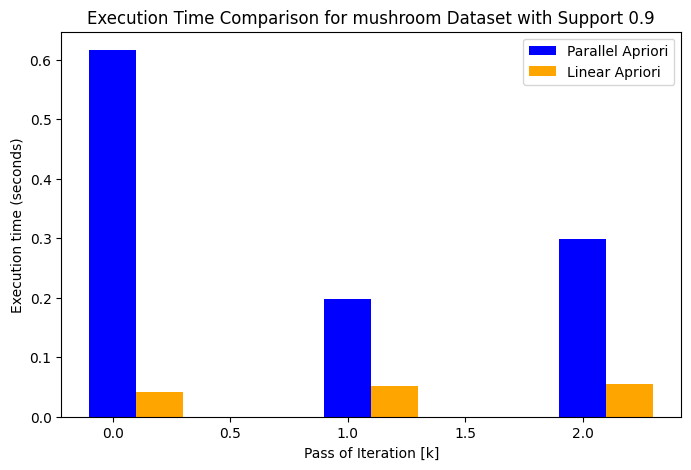

1.1128056049346924 0.1483476161956787


In [9]:
# Function to run both Linear and Parallel Apriori and plot the results
def run_and_plot(dataset_path, support_threshold):
    # Run Parallel Apriori
    time_list_p,total_time_p = ParallelAprioriRunner(dataset_path, support_threshold)

    # Run Linear Apriori
    time_list_s,total_time_s = LinearAprioriRunner(dataset_path, support_threshold)
    min_length = min(len(time_list_p),len(time_list_s))
    # Create a list for the x-axis (pass of iteration)
    # k_list = list(range(1, min_length + 1))
    k_list = np.arange(min_length)
    total_time_p=sum(time_list_p)
    total_time_s=sum(time_list_s)
    print(f"Total time for Parallel Apriori execution: {total_time_p:.2f} seconds")
    print(f"Total time for Linear Apriori execution: {total_time_s:.2f} seconds")
    # Plot Parallel and Linear Apriori on the same figure
    plt.figure(figsize=(8, 5))
    width=0.2
    plt.bar(k_list, time_list_p[:min_length], color='blue', width=0.2, label='Parallel Apriori')
    plt.bar(k_list+width, time_list_s[:min_length], color='orange', width=0.2, label='Linear Apriori')

    plt.xlabel("Pass of Iteration [k]")
    plt.ylabel("Execution time (seconds)")
    plt.title(f"Execution Time Comparison for mushroom Dataset with Support {support_threshold}")
    plt.legend()
    plt.show()
    return total_time_p,total_time_s

total_time_p,total_time_s = run_and_plot(mushroom, 0.9)
print(total_time_p,total_time_s)

6499.200000000001
Combi Set1: [{'34'}, {'25'}, {'67'}, {'38'}, {'113'}, {'86'}, {'40'}, {'3'}, {'107'}, {'93'}, {'13'}, {'36'}, {'1'}, {'59'}, {'98'}, {'52'}, {'54'}, {'90'}, {'23'}, {'85'}, {'9'}, {'63'}, {'76'}, {'14'}, {'2'}, {'99'}, {'114'}, {'55'}, {'26'}, {'39'}, {'108'}, {'27'}, {'41'}, {'4'}, {'115'}, {'15'}, {'10'}, {'24'}, {'37'}, {'16'}, {'53'}, {'28'}, {'94'}, {'109'}, {'42'}, {'110'}, {'43'}, {'44'}, {'64'}, {'11'}, {'5'}, {'111'}, {'6'}, {'56'}, {'116'}, {'57'}, {'117'}, {'65'}, {'100'}, {'60'}, {'45'}, {'77'}, {'68'}, {'69'}, {'78'}, {'46'}, {'17'}, {'66'}, {'95'}, {'70'}, {'79'}, {'29'}, {'101'}, {'61'}, {'71'}, {'18'}, {'30'}, {'80'}, {'102'}, {'72'}, {'118'}, {'91'}, {'47'}, {'112'}, {'19'}, {'58'}, {'48'}, {'31'}, {'96'}, {'20'}, {'119'}, {'103'}, {'21'}, {'7'}, {'81'}, {'22'}, {'32'}, {'82'}, {'12'}, {'8'}, {'49'}, {'50'}, {'73'}, {'83'}, {'35'}, {'87'}, {'51'}, {'88'}, {'104'}, {'74'}, {'84'}, {'92'}, {'97'}, {'33'}, {'105'}, {'106'}, {'62'}, {'75'}, {'89'}]
Freq S

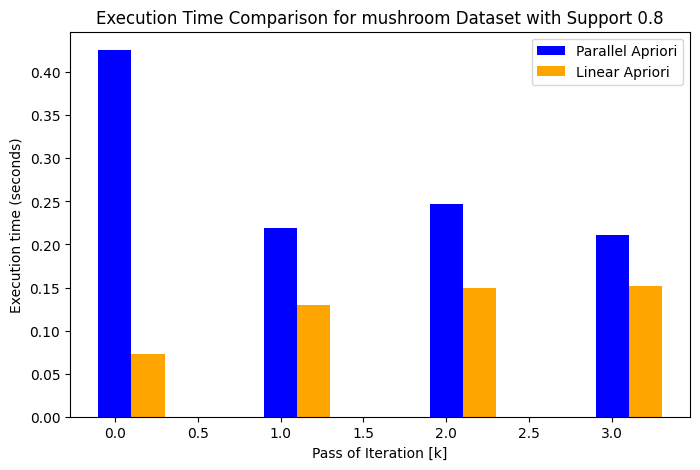

1.3139972686767578 0.5040602684020996


In [10]:
# Function to run both Linear and Parallel Apriori and plot the results
def run_and_plot(dataset_path, support_threshold):
    # Run Parallel Apriori
    time_list_p,total_time_p = ParallelAprioriRunner(dataset_path, support_threshold)

    # Run Linear Apriori
    time_list_s,total_time_s = LinearAprioriRunner(dataset_path, support_threshold)
    min_length = min(len(time_list_p),len(time_list_s))
    # Create a list for the x-axis (pass of iteration)
    # k_list = list(range(1, min_length + 1))
    k_list = np.arange(min_length)
    total_time_p=sum(time_list_p)
    total_time_s=sum(time_list_s)
    print(f"Total time for Parallel Apriori execution: {total_time_p:.2f} seconds")
    print(f"Total time for Linear Apriori execution: {total_time_s:.2f} seconds")
    # Plot Parallel and Linear Apriori on the same figure
    plt.figure(figsize=(8, 5))
    width=0.2
    plt.bar(k_list, time_list_p[:min_length], color='blue', width=0.2, label='Parallel Apriori')
    plt.bar(k_list+width, time_list_s[:min_length], color='orange', width=0.2, label='Linear Apriori')

    plt.xlabel("Pass of Iteration [k]")
    plt.ylabel("Execution time (seconds)")
    plt.title(f"Execution Time Comparison for mushroom Dataset with Support {support_threshold}")
    plt.legend()
    plt.show()
    return total_time_p,total_time_s

total_time_p,total_time_s = run_and_plot(mushroom, 0.8)
print(total_time_p,total_time_s)

3249.6000000000004
Combi Set1: [{'34'}, {'25'}, {'67'}, {'38'}, {'113'}, {'86'}, {'40'}, {'3'}, {'107'}, {'93'}, {'13'}, {'36'}, {'1'}, {'59'}, {'98'}, {'52'}, {'54'}, {'90'}, {'23'}, {'85'}, {'9'}, {'63'}, {'76'}, {'14'}, {'2'}, {'99'}, {'114'}, {'55'}, {'26'}, {'39'}, {'108'}, {'27'}, {'41'}, {'4'}, {'115'}, {'15'}, {'10'}, {'24'}, {'37'}, {'16'}, {'53'}, {'28'}, {'94'}, {'109'}, {'42'}, {'110'}, {'43'}, {'44'}, {'64'}, {'11'}, {'5'}, {'111'}, {'6'}, {'56'}, {'116'}, {'57'}, {'117'}, {'65'}, {'100'}, {'60'}, {'45'}, {'77'}, {'68'}, {'69'}, {'78'}, {'46'}, {'17'}, {'66'}, {'95'}, {'70'}, {'79'}, {'29'}, {'101'}, {'61'}, {'71'}, {'18'}, {'30'}, {'80'}, {'102'}, {'72'}, {'118'}, {'91'}, {'47'}, {'112'}, {'19'}, {'58'}, {'48'}, {'31'}, {'96'}, {'20'}, {'119'}, {'103'}, {'21'}, {'7'}, {'81'}, {'22'}, {'32'}, {'82'}, {'12'}, {'8'}, {'49'}, {'50'}, {'73'}, {'83'}, {'35'}, {'87'}, {'51'}, {'88'}, {'104'}, {'74'}, {'84'}, {'92'}, {'97'}, {'33'}, {'105'}, {'106'}, {'62'}, {'75'}, {'89'}]
Freq 

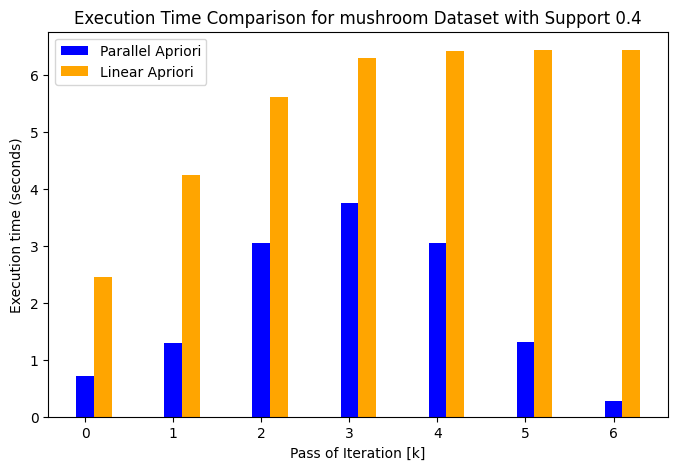

13.4404616355896 37.87114095687866


In [11]:
# Function to run both Linear and Parallel Apriori and plot the results
def run_and_plot(dataset_path, support_threshold):
    # Run Parallel Apriori
    time_list_p,total_time_p = ParallelAprioriRunner(dataset_path, support_threshold)

    # Run Linear Apriori
    time_list_s,total_time_s = LinearAprioriRunner(dataset_path, support_threshold)
    min_length = min(len(time_list_p),len(time_list_s))
    # Create a list for the x-axis (pass of iteration)
    # k_list = list(range(1, min_length + 1))
    k_list = np.arange(min_length)
    total_time_p=sum(time_list_p)
    total_time_s=sum(time_list_s)
    print(f"Total time for Parallel Apriori execution: {total_time_p:.2f} seconds")
    print(f"Total time for Linear Apriori execution: {total_time_s:.2f} seconds")
    # Plot Parallel and Linear Apriori on the same figure
    plt.figure(figsize=(8, 5))
    width=0.2
    plt.bar(k_list, time_list_p[:min_length], color='blue', width=0.2, label='Parallel Apriori')
    plt.bar(k_list+width, time_list_s[:min_length], color='orange', width=0.2, label='Linear Apriori')

    plt.xlabel("Pass of Iteration [k]")
    plt.ylabel("Execution time (seconds)")
    plt.title(f"Execution Time Comparison for mushroom Dataset with Support {support_threshold}")
    plt.legend()
    plt.show()
    return total_time_p,total_time_s

total_time_p,total_time_s = run_and_plot(mushroom, 0.4)
print(total_time_p,total_time_s)

2437.2
Combi Set1: [{'34'}, {'25'}, {'67'}, {'38'}, {'113'}, {'86'}, {'40'}, {'3'}, {'107'}, {'93'}, {'13'}, {'36'}, {'1'}, {'59'}, {'98'}, {'52'}, {'54'}, {'90'}, {'23'}, {'85'}, {'9'}, {'63'}, {'76'}, {'14'}, {'2'}, {'99'}, {'114'}, {'55'}, {'26'}, {'39'}, {'108'}, {'27'}, {'41'}, {'4'}, {'115'}, {'15'}, {'10'}, {'24'}, {'37'}, {'16'}, {'53'}, {'28'}, {'94'}, {'109'}, {'42'}, {'110'}, {'43'}, {'44'}, {'64'}, {'11'}, {'5'}, {'111'}, {'6'}, {'56'}, {'116'}, {'57'}, {'117'}, {'65'}, {'100'}, {'60'}, {'45'}, {'77'}, {'68'}, {'69'}, {'78'}, {'46'}, {'17'}, {'66'}, {'95'}, {'70'}, {'79'}, {'29'}, {'101'}, {'61'}, {'71'}, {'18'}, {'30'}, {'80'}, {'102'}, {'72'}, {'118'}, {'91'}, {'47'}, {'112'}, {'19'}, {'58'}, {'48'}, {'31'}, {'96'}, {'20'}, {'119'}, {'103'}, {'21'}, {'7'}, {'81'}, {'22'}, {'32'}, {'82'}, {'12'}, {'8'}, {'49'}, {'50'}, {'73'}, {'83'}, {'35'}, {'87'}, {'51'}, {'88'}, {'104'}, {'74'}, {'84'}, {'92'}, {'97'}, {'33'}, {'105'}, {'106'}, {'62'}, {'75'}, {'89'}]
Freq Set1: [({'34

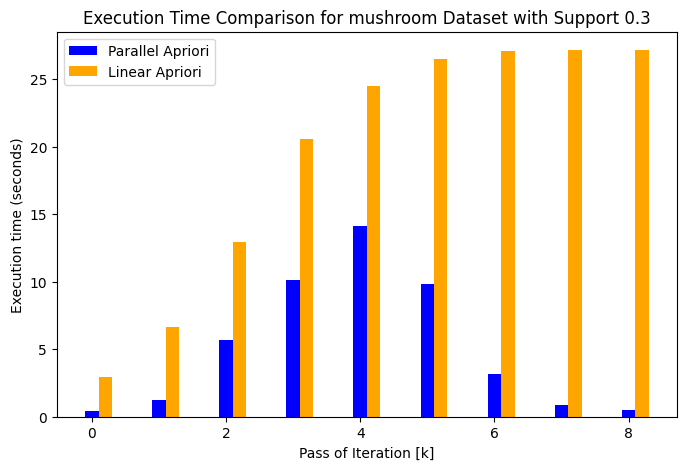

46.28307867050171 175.42865800857544


In [12]:
# Function to run both Linear and Parallel Apriori and plot the results
def run_and_plot(dataset_path, support_threshold):
    # Run Parallel Apriori
    time_list_p,total_time_p = ParallelAprioriRunner(dataset_path, support_threshold)

    # Run Linear Apriori
    time_list_s,total_time_s = LinearAprioriRunner(dataset_path, support_threshold)
    min_length = min(len(time_list_p),len(time_list_s))
    # Create a list for the x-axis (pass of iteration)
    # k_list = list(range(1, min_length + 1))
    k_list = np.arange(min_length)
    total_time_p=sum(time_list_p)
    total_time_s=sum(time_list_s)
    print(f"Total time for Parallel Apriori execution: {total_time_p:.2f} seconds")
    print(f"Total time for Linear Apriori execution: {total_time_s:.2f} seconds")
    # Plot Parallel and Linear Apriori on the same figure
    plt.figure(figsize=(8, 5))
    width=0.2
    plt.bar(k_list, time_list_p[:min_length], color='blue', width=0.2, label='Parallel Apriori')
    plt.bar(k_list+width, time_list_s[:min_length], color='orange', width=0.2, label='Linear Apriori')

    plt.xlabel("Pass of Iteration [k]")
    plt.ylabel("Execution time (seconds)")
    plt.title(f"Execution Time Comparison for mushroom Dataset with Support {support_threshold}")
    plt.legend()
    plt.show()
    return total_time_p,total_time_s

total_time_p,total_time_s = run_and_plot(mushroom, 0.3)
print(total_time_p,total_time_s)